<a href="https://colab.research.google.com/github/gparikh100/Adaptive-Binning/blob/master/MeanVarianceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STOCK MEAN VARIANCE ANALYSIS

The purpose of this script is to retrieve stock prices and analyze mean and variance, as well as create plots to show distribution of stock returns over time. 

In [133]:
!pip install yfinance
!pip install plotly==4.14.3
from IPython.display import clear_output
clear_output()

In [134]:
import pandas as pd
import random
import math
import statistics
import yfinance as yf
import seaborn as sns
import json
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt



In [135]:
BSE_30=['RELIANCE.NS','HDFCBANK.NS','INFY.NS','HDFC.NS','ICICIBANK.NS','TCS.NS','KOTAKBANK.NS','HINDUNILVR.NS','ITC.NS','AXISBANK.NS','LT.NS','BAJFINANCE.NS','SBIN.NS', 'BHARTIARTL.NS','ASIANPAINT.NS','HCLTECH.NS','MARUTI.NS','M&M.NS','ULTRACEMCO.NS','SUNPHARMA.NS','TITAN.NS','TECHM.NS','NESTLEIND.NS','BAJAJFINSV.NS','POWERGRID.NS','INDUSINDBK.NS','TATASTEEL.NS','NTPC.NS','BAJAJ-AUTO.NS','ONGC.NS']



In [162]:
##stock_name=['TATAMOTORS.NS','HDFCBANK.NS','AXISBANK.NS','BANKBARODA.NS','CANBK.NS','SBICARD.NS','KOTAKBANK.NS','SBIN.NS', 'NESTLEIND.NS']
##stock_name=['TCS.NS','TATASTEEL.NS','ZENSARTECH.NS','STLTECH.NS','CEAT.NS','RELIANCE.NS','ICICIBANK.NS','HDFCBANK.NS','AXISBANK.NS','BANKBARODA.NS','CANBK.NS','SBICARD.NS','KOTAKBANK.NS','SBIN.NS', 'NESTLEIND.NS']
##stock_name=['CEATLTD.NS','APOLLOTYRE.NS','JKTYRE.NS','BIRLATYRE.NS','MRF.NS','BALKRISIND.NS','GOODYEAR.NS']
##stock_name=['BAJFINANCE.NS','MUTHOOTFIN.NS','ICICIBANK.NS', 'CANFINHOME.NS', 'SUNDARMFIN.NS','^NSEI','EICHERMOT.NS','SREINFRA.NS']
##stock_name=['IDFCFIRSTB.NS','WIPRO.NS','HDFCLIFE.NS','HCLTECH.NS','MUTHOOTFIN.NS','ICICIBANK.NS','^NSEI']
stock_name=['HDFCBANK.NS', 'DABUR.NS','RELIANCE.NS','MUTHOOTFIN.NS','ICICIBANK.NS','^NSEI','ASIANPAINT.NS']
## BSE 30 Sensex stocks on 14June2021
##US Stocks- Rajiv Kalra
##stock_name=['MSFT','GOOG','FB','AAPL', 'NOK','AMZN','BAC','NFLX','TSM','WFC','PANW','WDAY','SBUX','VMW','CMG','BABA','SPY']
# US=['MSFT','GOOG']
# brew=['ASALCBR.BO','GMBREW.BO','GLOBUSSPR.BO','IFBAGRO.BO','JAGAJITIND.BO','KHODAY.BO','PIONDIST.BO','RADICO.BO','RKDL.BO','SILVOAK.BO','SDBL.BO','TI.BO','UBL.BO','UNITDSPR.BO','WINSOMBR.BO']
# stock_name=BSE_30

In [163]:
def retreiveVWAP(stock_name,start,end,interval='1d'):
  """
    This function returns dataframe with VWAP price for specified period
    :param stock_name: list of stocks
    :param start: start date
    :param end: end date 
    :return: dataframe with closing price for specified period
  """
  df_merged=pd.DataFrame
  df_VWAP = yf.download(stock_name, 
                    start = start,
                    end = end, autoadjust= True,back_adjust=True, interval =interval).drop(columns=["Open", "High", "Low","Volume"], axis=1)
    # df_VWAP[stock_name[i]]=df_VWAP
    # if (i==0):
    #   df_merged_VWAP=df_VWAP[stock_name[i]]
    # else:
    #   df_merged_VWAP=pd.merge(df_merged_VWAP,df_VWAP[stock_name[i]], on='Date')
    # i=i+1
  return df_VWAP.Close
  

In [164]:
start="2012-12-10"
end="2022-6-6"
df_merged_VWAP=retreiveVWAP(stock_name,start,end,interval='1d')

[*********************100%***********************]  7 of 7 completed


In [165]:
df_merged_VWAP

,ASIANPAINT.NS,DABUR.NS,HDFCBANK.NS,ICICIBANK.NS,MUTHOOTFIN.NS,RELIANCE.NS,^NSEI
Date,,,,,,,
2012-12-10,431.585022,131.000000,346.500000,203.899994,199.550003,410.261139,5908.899902
2012-12-11,430.020020,131.050003,345.424988,204.118179,194.350006,406.174866,5898.799805
2012-12-12,432.049988,129.550003,346.924988,202.399994,188.250000,412.390961,5888.000000
2012-12-13,430.960022,130.100006,345.524994,203.863632,185.100006,413.208191,5851.500000
2012-12-14,428.079987,129.899994,344.375000,206.554550,199.899994,415.684723,5879.600098
...,...,...,...,...,...,...,...
2022-05-30,2844.000000,510.100006,1401.550049,748.500000,1120.050049,2664.800049,16661.400391
2022-05-31,2859.649902,519.000000,1388.949951,752.849976,1143.099976,2632.649902,16584.550781
2022-06-01,2852.500000,517.549988,1394.849976,752.650024,1111.949951,2633.500000,16522.750000


#Sampling Distribution of Returns



The idea in medium to long term investing is that an investor does not care about short term price fluctuations but is instead focussed on building a portfolio that has the best risk/ reward ratio. For any volatility in price of asset, the user expects to get an additional return as compensation for undertaking additional risk. 

Under this framework, a stable price asset must give negligible returns (at par with inflation, while a highly volaitle asset must give very high returns)


We use an ensemble method to estimate returns from stocks. The sampling return is a bootstrap of returns by drawing out sample returns for a given period with some term epsilon that changes the period to account for holidays or other barriers which may limit trading to exact period.

In [166]:
def pct_bootstrap_returns(df, n_samples=1000, trading_days=252 ,duration=1, epsilon=5):
  """
    This function returns asset percentage returns bootstrap sample vector with dimension n_samples*number of share for specified duration.
    :param df: dataframe with VWAP of stocks for given duration
    :param n_samples: number of bootstrap samples
    :param trading_days: number of bootstrap samples
    :param duration: number of bootstrap samples
    :param epsilon: number of bootstrap samples
    :return: dataframe with VWAP price for specified period
  """
  
  df_samples= pd.DataFrame(stock_name)
  for i in range(n_samples):
    s_date=min(math.floor(random.betavariate(1,1)*len(df)),len(df)-trading_days*duration-epsilon)
    e_date=min(math.floor(s_date+ trading_days*duration + random.random()*epsilon-epsilon),len(df))
    array=(df.iloc[e_date].values-df.iloc[s_date].values)/df.iloc[s_date].values
    df_samples[i]=array.tolist()
  df_samples=df_samples.T
  return df_samples

In [167]:
df_samples=pct_bootstrap_returns(df_merged_VWAP, n_samples=10000, trading_days=252 ,duration=1, epsilon=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [168]:
df_merged_VWAP

,ASIANPAINT.NS,DABUR.NS,HDFCBANK.NS,ICICIBANK.NS,MUTHOOTFIN.NS,RELIANCE.NS,^NSEI
Date,,,,,,,
2012-12-10,431.585022,131.000000,346.500000,203.899994,199.550003,410.261139,5908.899902
2012-12-11,430.020020,131.050003,345.424988,204.118179,194.350006,406.174866,5898.799805
2012-12-12,432.049988,129.550003,346.924988,202.399994,188.250000,412.390961,5888.000000
2012-12-13,430.960022,130.100006,345.524994,203.863632,185.100006,413.208191,5851.500000
2012-12-14,428.079987,129.899994,344.375000,206.554550,199.899994,415.684723,5879.600098
...,...,...,...,...,...,...,...
2022-05-30,2844.000000,510.100006,1401.550049,748.500000,1120.050049,2664.800049,16661.400391
2022-05-31,2859.649902,519.000000,1388.949951,752.849976,1143.099976,2632.649902,16584.550781
2022-06-01,2852.500000,517.549988,1394.849976,752.650024,1111.949951,2633.500000,16522.750000


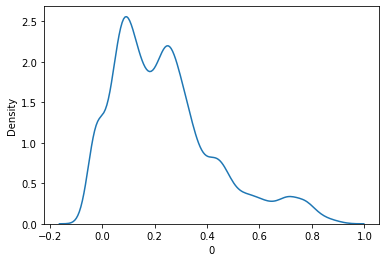

In [169]:
sns.kdeplot(df_samples[0])

We now plot a distribution function for our bootstrapped returns for our target stocks. The idea with this is to look at returns and estimate if our expectation value for returns is unimodal, bimodal and also if there is a given skew in the data. 

* In the following discussion the term derivative refers to the idea of rate of change in calculus 


A bimodal distribution suggests consistent periods of loss. A unimodal distribution suggests consistent gains with normal tendencies. For instance for a stock with a positive first derivative and changing positive to negative second derivative we would expect a normal distribution in the positive quadrant. 

For a stock with bimodal distribution we expect a period of negative slope with downward trend and changing second derivative. 

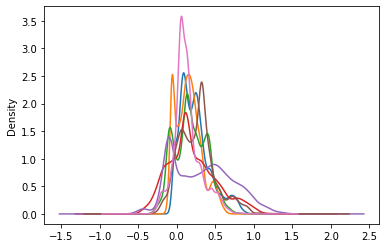

In [170]:
for i in range(len(df_samples.columns)):
  df_samples[i].plot(kind='kde')
plt.show()

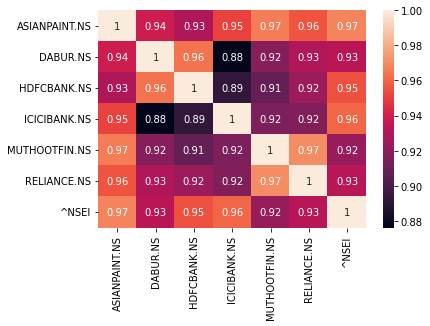

In [188]:
sns.heatmap(df_merged_VWAP.corr(),annot=True)

In [172]:
df_results= pd.DataFrame()
df_results["Mean"]=df_samples.mean()*100
df_results["StDev"]=df_samples.std()*100

In [173]:
risk_free=4.25 #risk free rate 
df_results["Sharpe Ratio"]=(df_results.Mean.values-risk_free)/df_results.StDev.values

In [174]:
Sharpe_Rounded = ([round(num, 2) for num in df_results["Sharpe Ratio"].values.tolist()])

In [175]:
Name=[str(n)+" "+str(m) for m,n in zip(Sharpe_Rounded,stock_name)]

In [176]:
df_results["Name"]=pd.DataFrame(Name)

In [177]:
df_results

,Mean,StDev,Sharpe Ratio,Name
0,23.918387,19.765519,0.995086,HDFCBANK.NS 1.0
1,15.567684,16.271549,0.695551,DABUR.NS 0.7
2,18.125127,20.725711,0.669464,RELIANCE.NS 0.67
3,19.984815,30.733715,0.511972,MUTHOOTFIN.NS 0.51
4,33.030769,38.682690,0.744022,ICICIBANK.NS 0.74
5,26.201156,23.399508,0.938103,^NSEI 0.94
6,13.687747,17.447732,0.540915,ASIANPAINT.NS 0.54


In [178]:
fig = px.scatter(df_results, x="StDev", y="Mean",text="Name", size_max=100,color='Sharpe Ratio',color_continuous_midpoint=0)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Historic Mean and StdDev of Stocks', title_x=0.5)
fig.show()

# Time Series Plots
We now show a plot of the all the stocks with the day one price scaled to 100 to show how the price changes over time for all stocks over time. 

In [179]:
df =df_merged_VWAP/df_merged_VWAP.iloc[0,:]*100
fig = px.line(df, x=df.index,y=df.columns)
fig.update_layout(template="plotly_dark")
fig.show()


# Financial Analysis 

The following part of the code attempts to find out financial insights to assess the financial health of a company. 

We will use the balance sheet, income statement and the cash flow statement to calculate some basic ratios, and we will also then explain some of the economic intuitions for using these ratios.


In [ ]:
import pandas as pd
import json
from urllib import request

In [ ]:
def json_to_df(json_str):
    """
    parse raw bytes do some clean up and return panda dataframes.
    :param json_str:
    :return:
    """
    data = []

    for row in json.loads(json_str):
        d = {}
        for k,v in row.items():
            if isinstance(v, dict):
                if k=='endDate':d[k]= v['fmt']
                elif k != 'maxAge' and ('raw' in v):d[k] = v['raw']
            else: d[k] = v
        data.append(d)
    df = pd.DataFrame(data)
    return df

In [ ]:
def get_fundamentals(ticker):
    """
    This function returns dataframes for balance sheets, income statements and cashflow statements
    :param ticker: company ticker
    :return: tuple of 3 dataframes
    """
    url = 'https://finance.yahoo.com/quote/%s/cash-flow' % ticker
    with request.urlopen(url) as response:
        html = response.read()
        cf_json = html.split(b'cashflowStatementHistory":{"cashflowStatements":')[1].split(b'],"maxAge"')[0] + b']'
        bs_json = html.split(b'"balanceSheetHistory":{"balanceSheetStatements":')[1].split(b'],"maxAge"')[0] + b']'
        is_json = html.split(b'incomeStatementHistory":{"incomeStatementHistory":')[1].split(b'],"maxAge"')[0] + b']'

    bs = json_to_df(bs_json).set_index('endDate').transpose()
    is_ = json_to_df(is_json).set_index('endDate').transpose()
    cf = json_to_df(cf_json).set_index('endDate').transpose()
    return bs, is_, cf


In [ ]:
def get_keystats(ticker):
    """
    Get key stats from Yahoo finance.
    :param ticker: ticker of the company
    :return: a panda data series
    """
    url = 'https://finance.yahoo.com/quote/%s/key-statistics'%ticker
    with request.urlopen(url) as response:
        html = response.read()
        key_stats = html.split(b'"QuoteSummaryStore":')[1].split(b',"financialsTemplate"')[0]+b'}'
    key_stats = json.loads(key_stats)['defaultKeyStatistics']
    return  pd.DataFrame(key_stats).transpose()['raw'].dropna()

In [ ]:
def get_competitors(ticker):
    """
    get competitors list by exctracting yahoo's recommendations
    :param ticker:
    :return:
    """
    url = 'https://finance.yahoo.com/quote/%s/analysis' % ticker
    print(url)
    with request.urlopen(url) as response:
        html = response.read()
        data = html.split(b'"recommendedSymbols":')[1].split(b',"recommendedSymbolsByPortfolio"')[0]
    peers = json.loads(data)

    df = json_to_df(json.dumps(peers[ticker]))

    return df.set_index('symbol')[['currency', 'exchange',
                                   'exchangeTimezoneName', 'longName',
                                   'marketCap', 'sharesOutstanding']].transpose()